In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
hbar = 1e-27 # erg.s, Planck's constant
h_Planck = hbar * 2*np.pi # erg.s, Planck's constant
c = 3e10 # cm/s, speed of light
m_p = 1.6e-24 # g, proton mass
a0 = 0.5e-8 # cm, Bohr radius
kB = 1.4e-16 # erg/K, Boltzmann constant
q = 5e-10 # esu, electron charge

m_C = 12*m_p
m_O = 16*m_p
parallel = lambda lst: (sum([1/x for x in lst]))**-1 if 0 not in lst else 0

In [79]:
def omega0_diatom(m1=m_C, m2=m_O, x=2*a0) -> float:
    '''
    Inputs:
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x: Float, cm. Internuclear distance between the atoms.
    Returns:
        Float. The natural frequency of a diatomic molecule, in rad/s.
    '''
    k_spring = q**2 / x**3 # spring constant
    mu = parallel([m1, m2]) # reduced mass
    return np.sqrt(k_spring/mu)

def E_vib_diatom(n, m1=m_C, m2=m_O, x=2*a0) -> float:
    '''
    Inputs:
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x: Float, cm. Atomic separation.
    Returns:
        Float. The energy of a diatom's nth vibrational state, in ergs.
    '''
    omega0 = omega0_diatom(m1, m2, x)
    return hbar * omega0 * (n+0.5)

def I_diatom(J, n, m1=m_C, m2=m_O, x0=2*a0) -> float:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation n=0.
    Returns:
        Float. The moment of inertia of a diatom in g.cm^2.
    '''
    x = x0 # TODO adjust internuclear separation
    # TODO what is the J dependence?
    return parallel([m1, m2]) * x**2

def E_rot_diatom(J, n, m1=m_C, m2=m_O, x0=2*a0) -> float:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
    Returns:
        Float. The energy of a diatom's rotational state with quantum
        numbers J and n in ergs.
    '''
    return hbar**2/(2*I_diatom(J,n,m1,m2,x0)) * J * (J+1)

def E_rovib_diatom(J, n, m1=m_C, m2=m_O, x0=2*a0) -> float:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
    Returns:
        Float. The energy of the state with vibrational quantum number n
        and rotational quantum number J, in ergs.
    '''
    E_vib = E_vib_diatom(n, m1, m2, x0)
    E_rot = E_rot_diatom(J, n, m1, m2, x0)
    return E_vib + E_rot

def g_degen(J) -> int:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
    Returns:
        Integer. Degeneracy of the state associated with rotational quantum
        number J.
    '''
    return 2*J + 1

def omega_rovib(Ji, Jf, delta_n=1, m1=m_C, m2=m_O, x0=2*a0) -> float:
    '''
    Inputs:
        Ji: Integer. Initial rotational quantum number.
        Jf: Integer. Final rotational quantum number.
        delta_n: Integer. Change in vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
    Returns:
        Float. Frequency (in rad/s) of the photon associated with a 
        transition with delta_n=delta_n and delta_J=Jf-Ji.
    '''
    E = E_rovib_diatom(Jf, delta_n, m1, m2, x0) - E_rovib_diatom(Ji, 0, m1, m2, x0)
    return E/hbar

def A_dip(Ji, Jf, delta_n=1, m1=m_C, m2=m_O, x0=2*a0) -> float:
    '''
    Inputs:
        Ji: Integer. Initial rotational quantum number.
        Jf: Integer. Final rotational quantum number.
        delta_n: Integer. Change in vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
    Returns:
        Float. 
    '''
    # Energy
    E = E_rovib_diatom(Jf, delta_n, m1, m2, x0) - E_rovib_diatom(Ji, 0, m1, m2, x0)
    
    # Larmor radiation from vibration???
#     omega = omega0_diatom(m1, m2, x0) * np.abs(nf-ni)
    omega = E/hbar
    P_larmor = 2/3 * q**2/c**3 * omega**4 * x0**2 

    P = P_larmor # TODO finish?
    return P/E

<h1>1</h1>

In [49]:
k_center = 2145 # cycles/cm, center wavenumber
nu0_CO = 4.2e-13/h_Planck # value given in class

# nu0_CO = omega0_diatom()/(2*np.pi)
nu_center = k_center*c # Hz
Delta_n = nu_center/nu0_CO
print(f'Delta n (Computed):\t{Delta_n}')
print("nu_center:\t\t{:.2e} Hz".format(nu_center))
print(f'n:\t\t\t{int(round(Delta_n))} -> 0')

Delta n (Computed):	0.9626737488500153
nu_center:		6.44e+13 Hz
n:			1 -> 0


<h1>2</h1>

In [59]:
J_vec = np.array(range(10))
T_vec = np.arange(1, 3000, 1)
plt.rcParams['figure.figsize'] = (16, 8)

# Keeping track of the temperature at which the ratio n_{J+1}/n_J exceeds 1
T_cross1_J = [np.inf]*len(J_vec)
ratio_nJ_dict = dict()

for i,J in enumerate(J_vec):
    dE_rot = E_rot_diatom(J+1, 0) - E_rot_diatom(J, 0)
    ratio_nJ_dict[J] = g_degen(J+1)/g_degen(J) * np.exp(-dE_rot/(kB*T_vec))

    idx_cross1_J = np.argwhere(np.diff(np.sign(ratio_nJ_dict[J]-1))).flatten()
    assert len(idx_cross1_J) < 2, f'J={J}: ratio does not monotonically increase with temperature'
    if len(idx_cross1_J) == 1:
        T_cross1_J[i] = T_vec[idx_cross1_J[0]]

Temperature Range: [416, 526) K


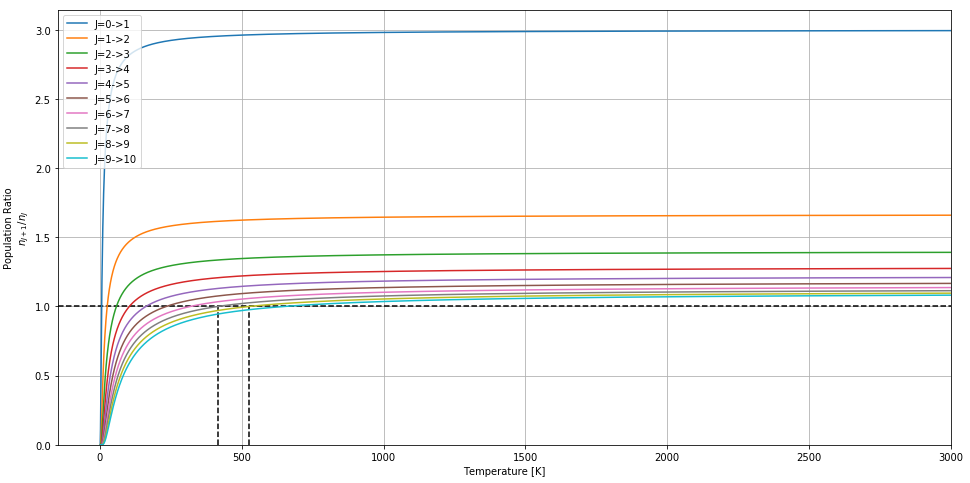

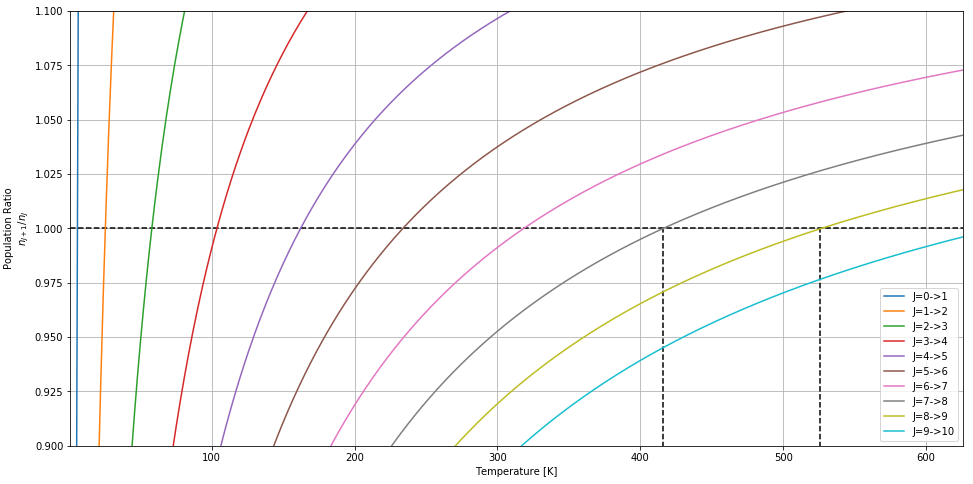

In [76]:
J_infl = 7 # value of J where n_J/n_{J-1} > 1 and n_{J+1}/n_J < 1

# Plotting
for J in J_vec:
    plt.plot(T_vec, ratio_nJ_dict[J], label=f'J={J}->{J+1}')
plt.legend()
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Population Ratio\n$n_{J+1}/n_J$')
plt.xlim(*plt.xlim())
plt.xlim(right=max(T_vec))
plt.ylim(0)

# Annotations
plt.hlines(1, *plt.xlim(), linestyles='dashed')
T_min = T_cross1_J[J_infl]
T_max = T_cross1_J[J_infl+1]
plt.vlines(T_min, 0, 1, linestyles='dashed')
plt.vlines(T_max, 0, 1, linestyles='dashed')
print(f'Temperature Range: [{T_min}, {T_max}) K')

# For visibility
plt.figure()
for J in J_vec:
    plt.plot(T_vec, ratio_nJ_dict[J], label=f'J={J}->{J+1}')
plt.legend()
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Population Ratio\n$n_{J+1}/n_J$')
plt.xlim(min(T_vec), T_max+100)
plt.ylim(0.9, 1.1)

# Annotations
plt.hlines(1, *plt.xlim(), linestyles='dashed')
plt.vlines(T_min, 0, 1, linestyles='dashed')
plt.vlines(T_max, 0, 1, linestyles='dashed')

<h1>3</h1>

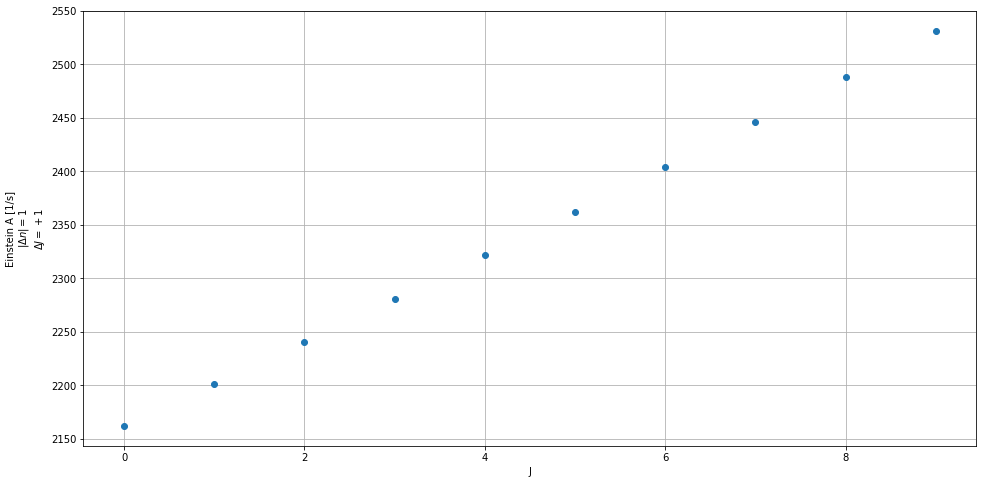

In [82]:
A_vec = [0] * len(J_vec)
for i, J in enumerate(J_vec):
    pass
    A_vec[i] = A_dip(Ji=J, Jf=J+1)
plt.plot(J_vec, A_vec, 'o')
plt.xlabel('J')
plt.ylabel('Einstein A [1/s]\n$|\Delta n|=1$\n$\Delta J=+1$')
plt.grid()

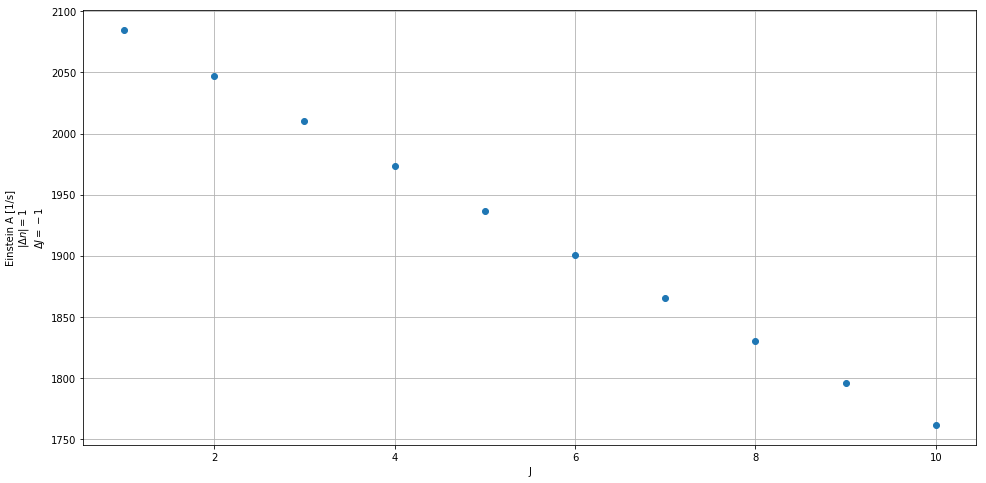

In [83]:
A_vec = [0] * len(J_vec)
for i, J in enumerate(J_vec):
    pass
    A_vec[i] = A_dip(Ji=J+1, Jf=J)
plt.plot(J_vec+1, A_vec, 'o')
plt.xlabel('J')
plt.ylabel('Einstein A [1/s]\n$|\Delta n|=1$\n$\Delta J=-1$')
plt.grid()

<h1>4</h1>

In [90]:
T = (T_min+T_max)/2
nu_vec_incr = omega_rovib(Ji=J_vec, Jf=J_vec+1)/(2*np.pi)
nu_vec_decr = omega_rovib(Ji=J_vec+1, Jf=J_vec)/(2*np.pi)
k_vec_incr = nu_vec_incr/c
k_vec_decr = nu_vec_decr/c

print(k_vec_incr)
print(k_vec_decr)

[805.659826   810.49526264 815.33069928 820.16613592 825.00157256
 829.8370092  834.67244584 839.50788247 844.34331911 849.17875575]
[795.98895272 791.15351608 786.31807944 781.48264281 776.64720617
 771.81176953 766.97633289 762.14089625 757.30545961 752.47002297]
